Perplexity=4 completed in 1.22 sec
Perplexity=6 completed in 1.22 sec
Perplexity=9 completed in 1.19 sec
Perplexity=14 completed in 1.30 sec
Perplexity=21 completed in 2.15 sec
Perplexity=30 completed in 2.77 sec
Perplexity=45 completed in 1.92 sec
Perplexity=66 completed in 2.24 sec
Perplexity=100 completed in 2.43 sec


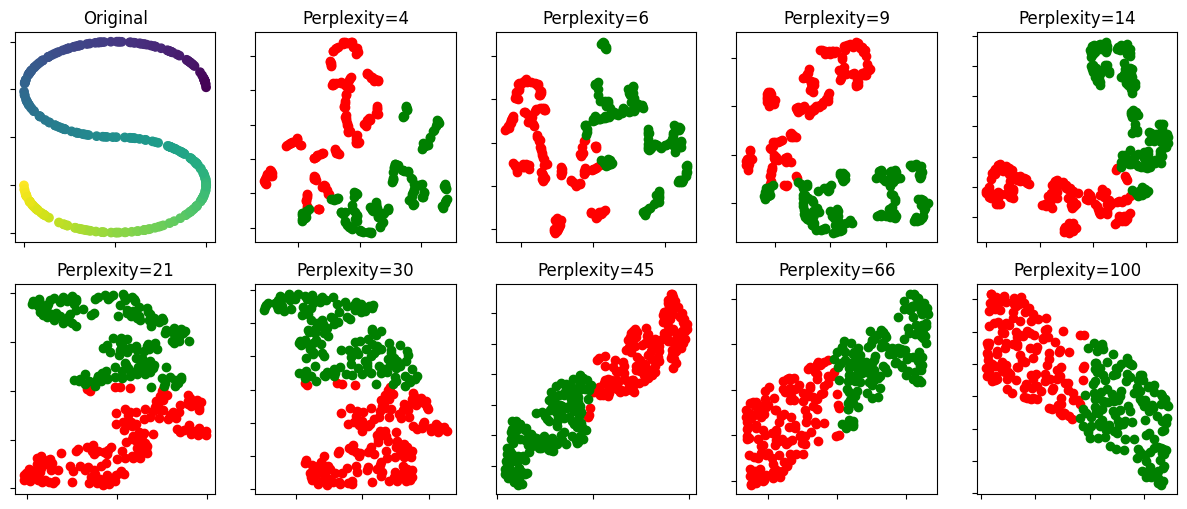

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import datasets, manifold
from time import time

# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# 生成 S 曲線數據
X, color = datasets.make_s_curve(n_samples, random_state=0)

# 繪製原始 S 曲線數據
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.viridis)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis('tight')


# 針對不同 perplexity 進行 t-SNE 降維與繪圖
for i, perplexity in enumerate(perplexities):
    row = (i+1) // 5  # 0 或 1
    col = (i+1) % 5   # 0 到 4
    ax = subplots[row][col]  # 正確索引 subplot

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random', random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()

    print(f"Perplexity={perplexity} completed in {t1 - t0:.2f} sec")
    ax.set_title(f"Perplexity={perplexity}")

    # 使用 color 來定義紅色與綠色區域
    red = color < np.median(color)
    green = color >= np.median(color)

    ax.scatter(Y[red, 0], Y[red, 1], c="r", label="Low values")
    ax.scatter(Y[green, 0], Y[green, 1], c="g", label="High values")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


plt.show()
